<a href="https://colab.research.google.com/github/JiaYong02/Suicidal-Detection-NLP/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Building

## Read and tokenize

In [ ]:
# import
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text Sentiment Lab/Dataset/cleaned_Suicide_Detection_without_Token.csv')

In [ ]:
df

,text,class
0,wife threatening suicide recently left wife go...,suicide
1,weird get affected compliment coming someone k...,non-suicide
2,finally almost never hear bad year ever swear ...,non-suicide
3,need help help cry hard,suicide
4,lost hello name struggling year afraid past ye...,suicide
...,...,...
230342,like rock going get anything music taste space...,non-suicide
230343,tell many friend lonely everything bought litt...,non-suicide
230344,pee probably taste like salty tea someone dran...,non-suicide
230345,usual stuff find posting sympathy pity know fa...,suicide


In [ ]:
df.shape

(230347, 2)

## Prepare Training and Testing dataset


### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Encoding Label

In [ ]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [ ]:
# Get the mapping of original labels to encoded values
label_mapping = dict(zip(Encoder.classes_, Encoder.transform(Encoder.classes_)))

# Print the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} : {encoded_value}")

Label Mapping:
non-suicide : 0
suicide : 1


### Word Vectorization

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['text'])

X_train = Tfidf_vect.fit_transform(X_train)
X_test = Tfidf_vect.transform(X_test)


In [ ]:
print(Tfidf_vect.vocabulary_)

{'truly': 21726, 'wish': 23495, 'die': 5645, 'think': 21060, 'lately': 11651, 'extremely': 7362, 'abusive': 94, 'recently': 16756, 'split': 19601, 'get': 8659, 'restraining': 17315, 'order': 14270, 'one': 14174, 'friend': 8294, 'victim': 22877, 'rape': 16602, 'suicide': 20317, 'week': 23258, 'another': 840, 'account': 151, 'talk': 20690, 'person': 15068, 'support': 20411, 'family': 7468, 'father': 7527, 'said': 17849, 'golden': 8850, 'age': 423, 'people': 14960, 'like': 11925, 'hung': 9969, 'college': 3820, 'washout': 23167, 'absolutely': 70, 'motivation': 13299, 'anything': 898, 'losing': 12161, 'interest': 10883, 'thing': 21058, 'previously': 15903, 'able': 34, 'amidst': 684, 'depression': 5426, 'lost': 12163, 'everything': 7104, 'everyone': 7103, 'actually': 232, 'supposed': 20416, 'jump': 11293, 'bridge': 2503, 'overdose': 14435, 'thought': 21089, 'mind': 12954, 'turn': 21807, 'right': 17509, 'almost': 590, 'comfort': 3876, 'memory': 12756, 'final': 7746, 'year': 23727, 'school': 1

In [ ]:
print(X_train)

  (0, 3876)	0.1543897796763967
  (0, 590)	0.10253474930623138
  (0, 17509)	0.07977183473317274
  (0, 21807)	0.11588331027682765
  (0, 12954)	0.10177731206288608
  (0, 21089)	0.07749372915417128
  (0, 14435)	0.1544330651295196
  (0, 2503)	0.15245209324996314
  (0, 11293)	0.1404366117304659
  (0, 20416)	0.12398152141423523
  (0, 232)	0.09573783256045075
  (0, 7103)	0.08462172201440799
  (0, 7104)	0.0801649600213996
  (0, 12163)	0.10013614222968542
  (0, 5426)	0.09394773116095724
  (0, 684)	0.24583701613607886
  (0, 34)	0.10034985114956235
  (0, 15903)	0.1859162900252408
  (0, 21058)	0.067451783488511
  (0, 10883)	0.13839741878162157
  (0, 12161)	0.13132565775729962
  (0, 898)	0.07751674301692112
  (0, 13299)	0.13643999808564353
  (0, 70)	0.12882927213664738
  (0, 23167)	0.322309849357711
  :	:
  (161241, 13349)	0.04354096679864931
  (161241, 23603)	0.05724171465035156
  (161241, 18003)	0.04768720947436165
  (161241, 12368)	0.04227026060354419
  (161241, 7717)	0.08442305993658186
  (16124

In [ ]:
X_train.shape

(161242, 23827)

## XGBoost

In [ ]:
import xgboost as xgb

# Create XGBoost classifier
xgb = xgb.XGBClassifier(random_state = 100)

# Train the classifier
xgb.fit(X_train, y_train)

# Make predictions on the test set
predictions_xgb = xgb.predict(X_test)

# Calculate accuracy scores
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

print("XGBoost Model:")
print("Training Score: {}\nTest Score: {}".format(xgb_train_score, xgb_test_score))

XGBoost Model:
Training Score: 0.9276863348259139
Test Score: 0.9140727877867014


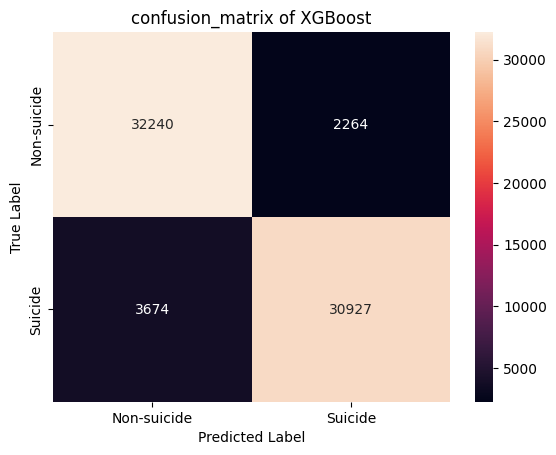

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ["Non-suicide", "Suicide"]
plt.title('confusion_matrix of XGBoost')
sns.heatmap(confusion_matrix(y_test,predictions_xgb),annot=True,fmt="d",xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb, target_names=labels))

              precision    recall  f1-score   support

 Non-suicide       0.90      0.93      0.92     34504
     Suicide       0.93      0.89      0.91     34601

    accuracy                           0.91     69105
   macro avg       0.91      0.91      0.91     69105
weighted avg       0.91      0.91      0.91     69105



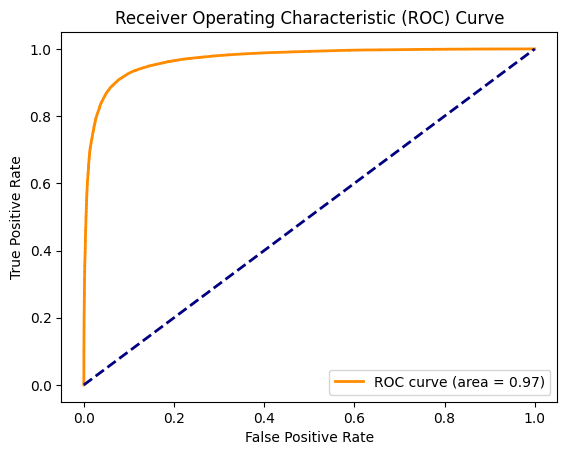

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparamter Tunning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create XGBoost classifier
new_xgb = xgb.XGBClassifier()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=new_xgb, param_grid=param_grid, n_jobs = -1, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Make predictions on the test set using the best model
best_xgb = grid_search.best_estimator_
predictions_test = best_xgb.predict(X_test)

# Calculate accuracy score on the test set
# Calculate accuracy scores
best_xgb_train_score = best_xgb.score(X_train, y_train)
best_xgb_test_score = best_xgb.score(X_test, y_test)

print()
print("XGB Model:")
print("Training Score: {}\nTest Score: {}" .format(best_xgb_train_score, best_xgb_test_score))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8996415551192113

XGB Model:
Training Score: 0.9082745190459062
Test Score: 0.9008031256783156


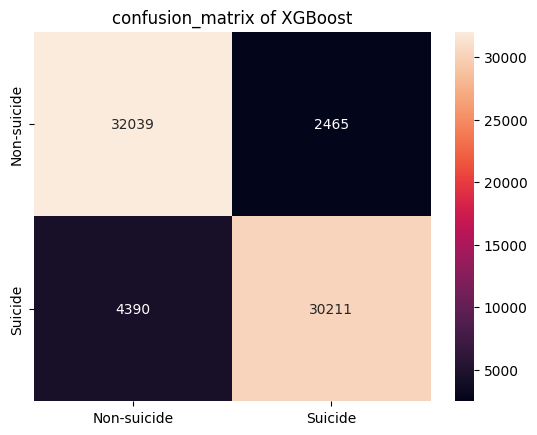

In [ ]:
from sklearn.metrics import confusion_matrix

plt.title('confusion_matrix of XGBoost')
sns.heatmap(confusion_matrix(y_test,predictions_test),annot=True,fmt="d",xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test, target_names=labels))

              precision    recall  f1-score   support

 Non-suicide       0.88      0.93      0.90     34504
     Suicide       0.92      0.87      0.90     34601

    accuracy                           0.90     69105
   macro avg       0.90      0.90      0.90     69105
weighted avg       0.90      0.90      0.90     69105



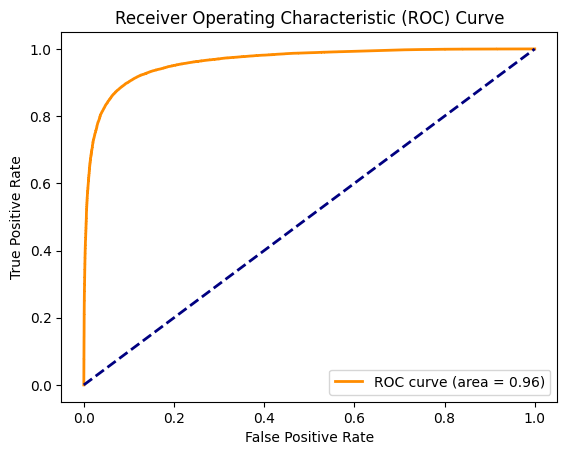

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()